# SCADA Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data/8 Hrs 3 Proc Normal.xlsx', sheet_name = 'Sheet1')

In [3]:
data_with_attacks = pd.read_excel('data/8 Hrs 3 Proc Normal+Attack.xlsx', 
                                  sheet_name = 'Combined Data')

## Cleaning Data

In [4]:
data.columns = ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'Normal/Attack']

In [5]:
data_with_attacks.columns = ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203',
       'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', 'MV303', 'MV304', 'P301', 'P302', 'Normal/Attack']

In [6]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [7]:
data_with_attacks['Timestamp'] = pd.to_datetime(data_with_attacks['Timestamp'])

In [8]:
data.head(2)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,20.79839,2.235275,327.4401,1,2,1,1,2,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,20.79839,2.234507,327.4401,1,2,1,1,2,1,Normal


In [9]:
data_with_attacks.head(2)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,19.74838,2.206835,956.1651,1,2,1,1,1,2,Normal
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,19.74838,2.208244,956.1651,1,2,1,1,1,2,Normal


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FIT101,28800.0,2.002688,1.042341,0.00000,2.426737,2.506806,2.602889,2.691285
LIT101,28800.0,470.272027,194.098349,120.62370,308.722900,499.726900,633.068500,1000.000000
MV101,28800.0,1.782465,0.418841,0.00000,2.000000,2.000000,2.000000,2.000000
P101,28800.0,1.756215,0.429372,1.00000,2.000000,2.000000,2.000000,2.000000
P102,28800.0,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
AIT201,28800.0,261.524201,3.402827,244.32840,261.375300,262.240400,263.458100,266.341900
AIT202,28800.0,8.441801,0.192647,8.19008,8.339080,8.369520,8.423994,8.943733
AIT203,28800.0,453.297458,52.478419,300.84590,443.008200,462.496800,483.978500,548.423500
FIT201,28800.0,1.866156,1.057627,0.00000,2.451415,2.464614,2.471150,2.487810
MV201,28800.0,1.762188,0.434070,0.00000,2.000000,2.000000,2.000000,2.000000


In [11]:
data_with_attacks.describe().T

,count,mean,std,min,25%,50%,75%,max
FIT101,28799.0,1.873153,1.122206,0.000000,0.000000,2.529866,2.561253,2.693207
LIT101,28799.0,613.966093,120.151880,488.068800,510.285900,539.607700,732.770500,925.032300
MV101,28799.0,1.726657,0.456993,0.000000,1.000000,2.000000,2.000000,2.000000
P101,28799.0,1.765270,0.423838,1.000000,2.000000,2.000000,2.000000,2.000000
P102,28799.0,1.015452,0.123344,1.000000,1.000000,1.000000,1.000000,2.000000
AIT201,28799.0,262.524591,0.947022,259.837200,261.727800,262.657000,263.362000,266.085600
AIT202,28799.0,8.369088,0.200433,6.000000,8.361831,8.370802,8.396757,8.470778
AIT203,28799.0,327.190331,5.229555,314.842300,327.480100,329.325800,330.453700,335.273000
FIT201,28799.0,1.858044,1.046202,0.000000,2.421363,2.437702,2.442444,2.804857
MV201,28799.0,1.754575,0.441026,0.000000,2.000000,2.000000,2.000000,2.000000


## Visualizations

### Data without attacks

In [12]:
fig, a = plt.subplots(nrows = data.shape[1]-2, ncols = 1, figsize = (12, 7 * data.shape[1]), dpi = 200)
for i in range(1, data.shape[1]-1):
    data.iloc[:,[0,i]].plot(x = 'Timestamp', y = data.columns[i], ax = a[i-1])
    a[i-1].grid()
    a[i-1].set_title(data.columns[i]) 
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.suptitle('Data without attacks',fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/data_timeseries.pdf')
plt.close()

### Data with attacks

In [13]:
fig, a = plt.subplots(nrows = data_with_attacks.shape[1]-2, ncols = 1, 
                      figsize = (12, 7 * data_with_attacks.shape[1]), dpi = 200)
for i in range(1, data_with_attacks.shape[1]-1):
    data_with_attacks.iloc[:,[0,i]]\
    .plot(x = 'Timestamp', y = data_with_attacks.columns[i], ax = a[i-1], color = 'blue', label = 'Normal')
    to_plot = data_with_attacks.iloc[:,[0,i]][data_with_attacks['Normal/Attack'] == 'Attack']
    a[i-1].scatter(x = to_plot['Timestamp'], y = to_plot[data_with_attacks.columns[i]], color = 'red', 
                   label = 'Attack', marker = 'x')
    a[i-1].grid()
    a[i-1].set_title(data.columns[i])
    a[i-1].legend(loc="upper left")
plt.suptitle('Data with attacks',fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots/data_with_attack_timeseries.pdf')
plt.close()

## Bivariate Analysis

In [14]:
data_with_attacks.replace(to_replace = 'Normal', value = 0, inplace = True)
data_with_attacks.replace(to_replace = 'Attack', value = 1, inplace = True)

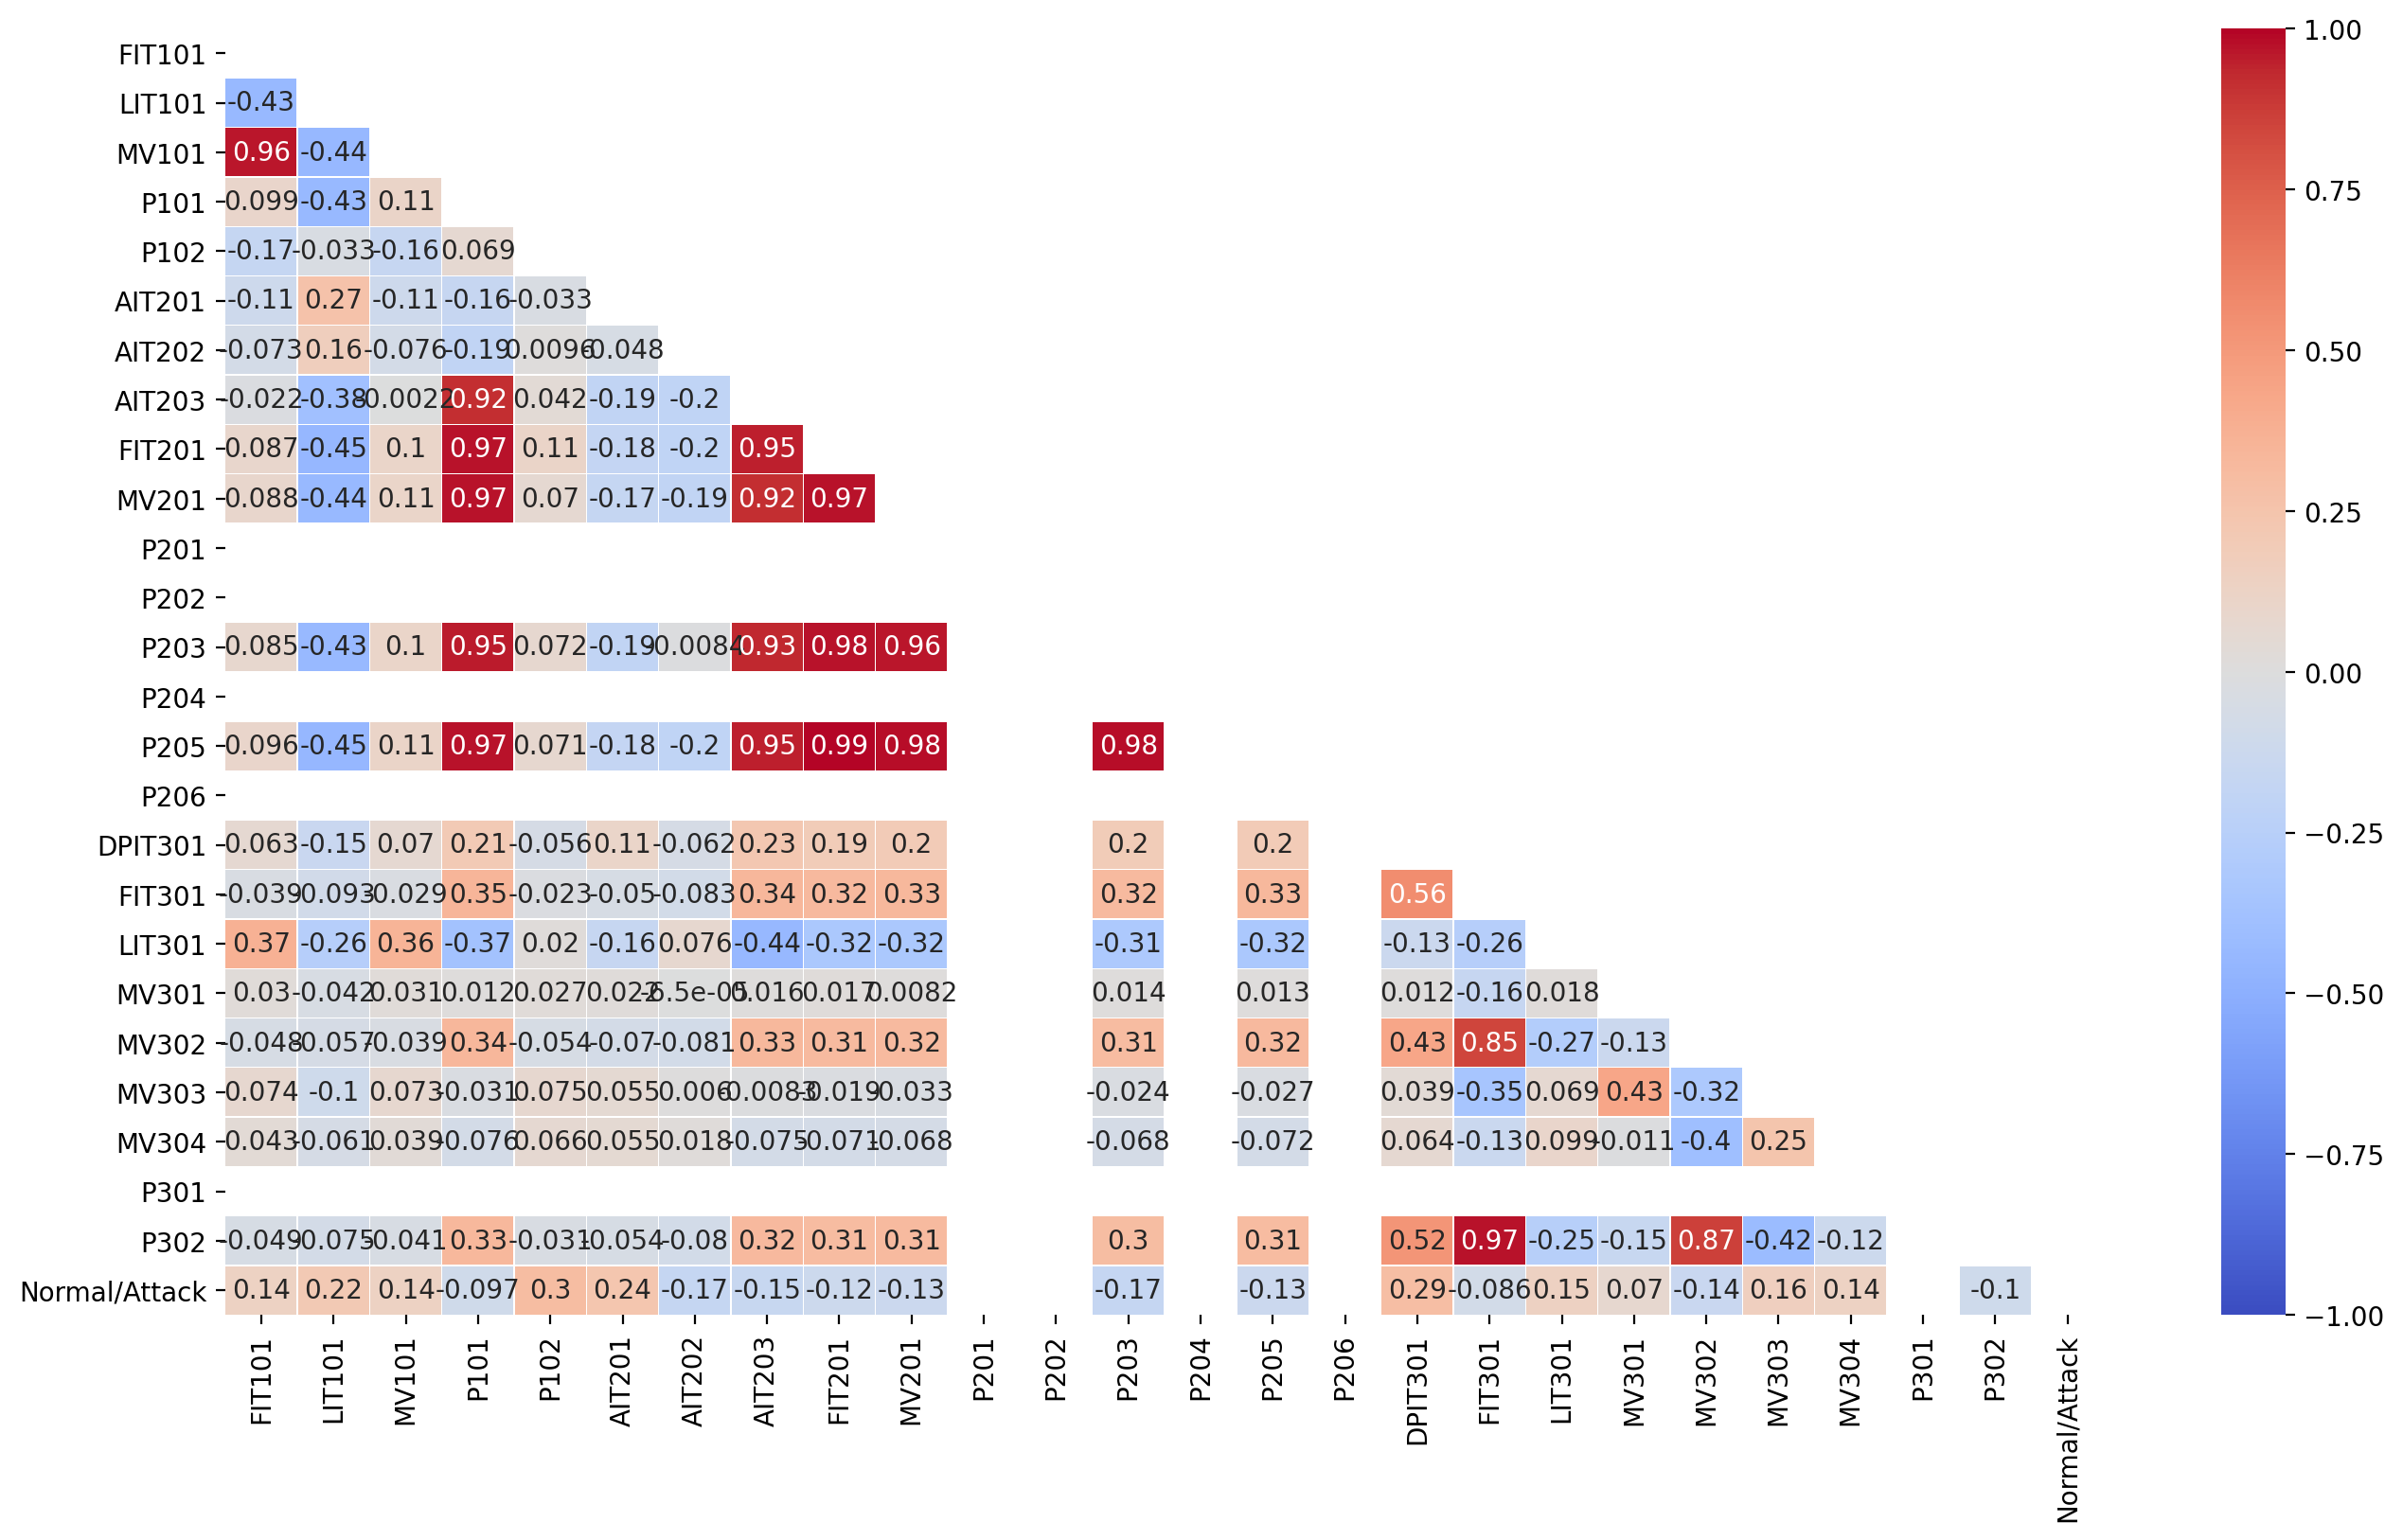

In [15]:
plt.figure(figsize=(16, 9), dpi = 200)
corr_plot = data_with_attacks.drop(['Timestamp'], axis = 1).corr()
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot,
            square=False, 
            linewidth=.1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

In [16]:
corr_plot['Normal/Attack'].sort_values()

P203            -0.167381
AIT202          -0.166915
AIT203          -0.153671
MV302           -0.141185
P205            -0.130825
MV201           -0.128785
FIT201          -0.117210
P302            -0.103434
P101            -0.096649
FIT301          -0.085554
MV301            0.070316
MV101            0.138237
MV304            0.138407
FIT101           0.140331
LIT301           0.147658
MV303            0.162696
LIT101           0.218400
AIT201           0.241335
DPIT301          0.292068
P102             0.298254
Normal/Attack    1.000000
P201                  NaN
P202                  NaN
P204                  NaN
P206                  NaN
P301                  NaN
Name: Normal/Attack, dtype: float64